# 10分钟入门pandas
教程译自[10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/version/0.18.0/10min.html)

## 目录
* [创建对象](#创建对象)
* [数据视图](#数据视图)
* [数据选取](#数据选取)
* [数据缺失的处理](#数据缺失的处理)
* [函数操作](#函数操作)
* [数据合并](#数据合并)
* [分组](#分组)
* [数据变形](#数据变形)
* [时间序列](#时间序列)
* [数据标签](#数据标签)
* [绘图](#绘图)
* [导入导出数据](#导入导出数据)

In [3]:
import numpy as np



In [4]:
import pandas as pd


In [5]:
import matplotlib.pyplot as plt


## 创建对象

[返回目录](#目录)

传入数据列表创建Series对象

In [6]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])


In [7]:
s


0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

创建DataFrame对象

通过时间索引，自定义标签列名，和numpy的array数据来创建DataFrame对象

In [8]:
dates = pd.date_range('20130101', periods=6)


In [9]:
dates


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))


In [11]:
df


,A,B,C,D
2013-01-01,-0.781977,-0.247265,0.726114,-0.342061
2013-01-02,0.333058,0.450728,-1.136102,0.386188
2013-01-03,1.322430,-1.171318,1.727632,-0.806535
2013-01-04,-0.890225,-0.141732,-0.877309,0.412904
2013-01-05,0.180001,-1.183532,-0.586190,0.328251
2013-01-06,0.484208,0.424342,0.015456,-0.044156


通过字典创建DataFrame对象

In [12]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(3, index=list(range(4)), dtype='float'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo',
                    'G': 2})


In [13]:
df2


,A,B,C,D,E,F,G
0,1.0,2013-01-02,3.0,3,test,foo,2
1,1.0,2013-01-02,3.0,3,train,foo,2
2,1.0,2013-01-02,3.0,3,test,foo,2
3,1.0,2013-01-02,3.0,3,train,foo,2


In [14]:
df2.dtypes


A           float64
B    datetime64[ns]
C           float64
D             int32
E          category
F            object
G             int64
dtype: object

In [15]:
dir(df2)


['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '_

## 数据视图

[返回目录](#目录)

观察数据的头部和尾部

In [16]:
df.head()


,A,B,C,D
2013-01-01,-0.781977,-0.247265,0.726114,-0.342061
2013-01-02,0.333058,0.450728,-1.136102,0.386188
2013-01-03,1.322430,-1.171318,1.727632,-0.806535
2013-01-04,-0.890225,-0.141732,-0.877309,0.412904
2013-01-05,0.180001,-1.183532,-0.586190,0.328251


In [17]:
df.tail(3)


,A,B,C,D
2013-01-04,-0.890225,-0.141732,-0.877309,0.412904
2013-01-05,0.180001,-1.183532,-0.586190,0.328251
2013-01-06,0.484208,0.424342,0.015456,-0.044156


查看DataFrame对象的索引，列名，数据信息

In [18]:
df.index


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [19]:
df.columns


Index(['A', 'B', 'C', 'D'], dtype='object')

In [20]:
df.values


array([[-0.78197712, -0.2472647 ,  0.72611442, -0.34206079],
       [ 0.33305753,  0.45072812, -1.13610154,  0.38618779],
       [ 1.32243032, -1.17131828,  1.72763191, -0.80653515],
       [-0.89022525, -0.14173203, -0.8773093 ,  0.41290427],
       [ 0.18000131, -1.18353201, -0.58618997,  0.32825068],
       [ 0.4842076 ,  0.42434243,  0.01545587, -0.04415637]])

简单统计

In [21]:
df.describe()


,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.107916,-0.311463,-0.021733,-0.010902
std,0.831952,0.728715,1.087509,0.489105
min,-0.890225,-1.183532,-1.136102,-0.806535
25%,-0.541483,-0.940305,-0.804529,-0.267585
50%,0.256529,-0.194498,-0.285367,0.142047
75%,0.446420,0.282824,0.548450,0.371704
max,1.322430,0.450728,1.727632,0.412904


转置数据

In [22]:
df.T


,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.781977,0.333058,1.322430,-0.890225,0.180001,0.484208
B,-0.247265,0.450728,-1.171318,-0.141732,-1.183532,0.424342
C,0.726114,-1.136102,1.727632,-0.877309,-0.586190,0.015456
D,-0.342061,0.386188,-0.806535,0.412904,0.328251,-0.044156


根据列名排序

In [23]:
df.sort_index(axis=1, ascending=False)


,D,C,B,A
2013-01-01,-0.342061,0.726114,-0.247265,-0.781977
2013-01-02,0.386188,-1.136102,0.450728,0.333058
2013-01-03,-0.806535,1.727632,-1.171318,1.322430
2013-01-04,0.412904,-0.877309,-0.141732,-0.890225
2013-01-05,0.328251,-0.586190,-1.183532,0.180001
2013-01-06,-0.044156,0.015456,0.424342,0.484208


根据B列数值排序

In [24]:
df.sort_values(by='B')


,A,B,C,D
2013-01-05,0.180001,-1.183532,-0.586190,0.328251
2013-01-03,1.322430,-1.171318,1.727632,-0.806535
2013-01-01,-0.781977,-0.247265,0.726114,-0.342061
2013-01-04,-0.890225,-0.141732,-0.877309,0.412904
2013-01-06,0.484208,0.424342,0.015456,-0.044156
2013-01-02,0.333058,0.450728,-1.136102,0.386188


## 数据选取

[返回目录](#目录)

### 选取

选取单列数据

In [25]:
df['A']


2013-01-01   -0.781977
2013-01-02    0.333058
2013-01-03    1.322430
2013-01-04   -0.890225
2013-01-05    0.180001
2013-01-06    0.484208
Freq: D, Name: A, dtype: float64

按行选取数据

In [26]:
df[0:3]


,A,B,C,D
2013-01-01,-0.781977,-0.247265,0.726114,-0.342061
2013-01-02,0.333058,0.450728,-1.136102,0.386188
2013-01-03,1.322430,-1.171318,1.727632,-0.806535


In [27]:
df['20130102':'20130104']


,A,B,C,D
2013-01-02,0.333058,0.450728,-1.136102,0.386188
2013-01-03,1.322430,-1.171318,1.727632,-0.806535
2013-01-04,-0.890225,-0.141732,-0.877309,0.412904


### 通过标签选取数据

In [28]:
df.loc[dates[0]]


A   -0.781977
B   -0.247265
C    0.726114
D   -0.342061
Name: 2013-01-01 00:00:00, dtype: float64

In [29]:
df.loc[:, ['A', 'B']]


,A,B
2013-01-01,-0.781977,-0.247265
2013-01-02,0.333058,0.450728
2013-01-03,1.322430,-1.171318
2013-01-04,-0.890225,-0.141732
2013-01-05,0.180001,-1.183532
2013-01-06,0.484208,0.424342


In [30]:
df.loc['20130102':'20130104', ['A', 'B']]


,A,B
2013-01-02,0.333058,0.450728
2013-01-03,1.322430,-1.171318
2013-01-04,-0.890225,-0.141732


In [31]:
df.loc['20130102', ['A', 'B']]


A    0.333058
B    0.450728
Name: 2013-01-02 00:00:00, dtype: float64

In [32]:
df.loc[dates[0], 'A']


-0.7819771239209625

In [33]:
df.at[dates[0], 'A']


-0.7819771239209625

### 通过位置选取数据

In [34]:
df.iloc[3]


A   -0.890225
B   -0.141732
C   -0.877309
D    0.412904
Name: 2013-01-04 00:00:00, dtype: float64

In [35]:
df.iloc[3:5, 0:2]


,A,B
2013-01-04,-0.890225,-0.141732
2013-01-05,0.180001,-1.183532


In [36]:
df.iloc[[1, 2, 4], [0, 2]]


,A,C
2013-01-02,0.333058,-1.136102
2013-01-03,1.322430,1.727632
2013-01-05,0.180001,-0.586190


In [37]:
df.iloc[1:3]


,A,B,C,D
2013-01-02,0.333058,0.450728,-1.136102,0.386188
2013-01-03,1.322430,-1.171318,1.727632,-0.806535


In [38]:
df.iloc[:, 1:3]


,B,C
2013-01-01,-0.247265,0.726114
2013-01-02,0.450728,-1.136102
2013-01-03,-1.171318,1.727632
2013-01-04,-0.141732,-0.877309
2013-01-05,-1.183532,-0.586190
2013-01-06,0.424342,0.015456


In [39]:
df.iloc[1, 1]


0.4507281187518068

In [40]:
df.iat[1, 1]


0.4507281187518068

### 布尔索引 

In [41]:
df[df.A > 0]


,A,B,C,D
2013-01-02,0.333058,0.450728,-1.136102,0.386188
2013-01-03,1.322430,-1.171318,1.727632,-0.806535
2013-01-05,0.180001,-1.183532,-0.586190,0.328251
2013-01-06,0.484208,0.424342,0.015456,-0.044156


In [42]:
df[df > 0]


,A,B,C,D
2013-01-01,NaN,NaN,0.726114,NaN
2013-01-02,0.333058,0.450728,NaN,0.386188
2013-01-03,1.322430,NaN,1.727632,NaN
2013-01-04,NaN,NaN,NaN,0.412904
2013-01-05,0.180001,NaN,NaN,0.328251
2013-01-06,0.484208,0.424342,0.015456,NaN


In [43]:
df2 = df.copy()


In [44]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']


In [45]:
df2


,A,B,C,D,E
2013-01-01,-0.781977,-0.247265,0.726114,-0.342061,one
2013-01-02,0.333058,0.450728,-1.136102,0.386188,one
2013-01-03,1.322430,-1.171318,1.727632,-0.806535,two
2013-01-04,-0.890225,-0.141732,-0.877309,0.412904,three
2013-01-05,0.180001,-1.183532,-0.586190,0.328251,four
2013-01-06,0.484208,0.424342,0.015456,-0.044156,three


In [46]:
df2[df2['E'].isin(['one', 'four'])]


,A,B,C,D,E
2013-01-01,-0.781977,-0.247265,0.726114,-0.342061,one
2013-01-02,0.333058,0.450728,-1.136102,0.386188,one
2013-01-05,0.180001,-1.183532,-0.586190,0.328251,four


### 修改数据

In [47]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))


In [48]:
s1


2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [49]:
df['F'] = s1


In [50]:
df.at[dates[0], 'A'] = 0


In [51]:
df.iat[0, 1] = 0


In [52]:
df.loc[:, 'D'] = np.array([5] * len(df))


/var/folders/k9/b1z4k_ts253fsvj7sbf50fkc0000gn/T/ipykernel_6616/438096961.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'D'] = np.array([5] * len(df))


In [53]:
df


,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.726114,5,NaN
2013-01-02,0.333058,0.450728,-1.136102,5,1.0
2013-01-03,1.322430,-1.171318,1.727632,5,2.0
2013-01-04,-0.890225,-0.141732,-0.877309,5,3.0
2013-01-05,0.180001,-1.183532,-0.586190,5,4.0
2013-01-06,0.484208,0.424342,0.015456,5,5.0


In [54]:
df2 = df.copy()


In [55]:
df2[df2 > 0] = -df2


In [56]:
df2


,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.726114,-5,NaN
2013-01-02,-0.333058,-0.450728,-1.136102,-5,-1.0
2013-01-03,-1.322430,-1.171318,-1.727632,-5,-2.0
2013-01-04,-0.890225,-0.141732,-0.877309,-5,-3.0
2013-01-05,-0.180001,-1.183532,-0.586190,-5,-4.0
2013-01-06,-0.484208,-0.424342,-0.015456,-5,-5.0


## 数据缺失的处理

[返回目录](#目录)

In [57]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])


In [58]:
df1.loc[dates[0]:dates[1], 'E'] = 1


In [59]:
df1


,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.726114,5,NaN,1.0
2013-01-02,0.333058,0.450728,-1.136102,5,1.0,1.0
2013-01-03,1.322430,-1.171318,1.727632,5,2.0,NaN
2013-01-04,-0.890225,-0.141732,-0.877309,5,3.0,NaN


舍弃含有NaN的行

In [60]:
df1.dropna(how='any')


,A,B,C,D,F,E
2013-01-02,0.333058,0.450728,-1.136102,5,1.0,1.0


填充缺失数据

In [61]:
df1.fillna(value=5)


,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.726114,5,5.0,1.0
2013-01-02,0.333058,0.450728,-1.136102,5,1.0,1.0
2013-01-03,1.322430,-1.171318,1.727632,5,2.0,5.0
2013-01-04,-0.890225,-0.141732,-0.877309,5,3.0,5.0


In [62]:
pd.isnull(df1)


,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 函数操作

[返回目录](#目录)

### 统计

纵向求均值

In [63]:
df.mean()


A    0.238245
B   -0.270252
C   -0.021733
D    5.000000
F    3.000000
dtype: float64

横向求均值

In [64]:
df.mean(1)


2013-01-01    1.431529
2013-01-02    1.129537
2013-01-03    1.775749
2013-01-04    1.218147
2013-01-05    1.482056
2013-01-06    2.184801
Freq: D, dtype: float64

In [65]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)


In [66]:
s


2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [67]:
df.sub(s, axis='index')


,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.322430,-2.171318,0.727632,4.0,1.0
2013-01-04,-3.890225,-3.141732,-3.877309,2.0,0.0
2013-01-05,-4.819999,-6.183532,-5.586190,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply函数

In [68]:
new_var = np.cumsum
df.apply(new_var)


,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.726114,5,NaN
2013-01-02,0.333058,0.450728,-0.409987,10,1.0
2013-01-03,1.655488,-0.720590,1.317645,15,3.0
2013-01-04,0.765263,-0.862322,0.440335,20,6.0
2013-01-05,0.945264,-2.045854,-0.145854,25,10.0
2013-01-06,1.429472,-1.621512,-0.130399,30,15.0


In [69]:
df.apply(lambda x: x.max() - x.min())


A    2.212656
B    1.634260
C    2.863733
D    0.000000
F    4.000000
dtype: float64

### 直方统计

In [70]:
s = pd.Series(np.random.randint(0, 7, size=10))


In [71]:
s


0    0
1    1
2    6
3    5
4    6
5    2
6    3
7    4
8    1
9    3
dtype: int64

In [72]:
s.value_counts()


1    2
6    2
3    2
0    1
5    1
2    1
4    1
dtype: int64

### 字符串方法

In [73]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])


In [74]:
s.str.lower()


0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 数据合并

[返回目录](#目录)

### Concat函数

In [75]:
df = pd.DataFrame(np.random.randn(10, 4))


In [76]:
df


,0,1,2,3
0,-0.020280,-2.041284,1.823207,1.925859
1,0.583139,1.925503,-1.189387,-0.243998
2,-0.549171,-0.283142,-0.433963,0.930136
3,-0.030505,-0.221367,1.125872,-2.103247
4,-1.155100,1.845407,-0.142884,0.548349
5,0.356572,0.629631,0.808132,-0.672107
6,2.221962,-0.266967,1.305140,0.856444
7,-0.687926,0.196254,-0.609931,0.317941
8,0.284073,-0.857435,-1.042339,0.508372
9,1.470658,0.882576,2.381142,-0.997699


In [77]:
pieces = [df[:3], df[3:6], df[7:]]


In [78]:
pd.concat(pieces)


,0,1,2,3
0,-0.020280,-2.041284,1.823207,1.925859
1,0.583139,1.925503,-1.189387,-0.243998
2,-0.549171,-0.283142,-0.433963,0.930136
3,-0.030505,-0.221367,1.125872,-2.103247
4,-1.155100,1.845407,-0.142884,0.548349
5,0.356572,0.629631,0.808132,-0.672107
7,-0.687926,0.196254,-0.609931,0.317941
8,0.284073,-0.857435,-1.042339,0.508372
9,1.470658,0.882576,2.381142,-0.997699


### Join函数

In [79]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})


In [80]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})


In [81]:
left


,key,lval
0,foo,1
1,foo,2


In [82]:
right


,key,rval
0,foo,4
1,foo,5


In [83]:
pd.merge(left, right, on='key')


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append函数

In [84]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])


In [85]:
df


,A,B,C,D
0,0.447063,-0.378511,1.907126,0.460772
1,-0.657835,1.748632,-1.543941,0.189094
2,-1.058485,-0.175321,-0.417835,0.577290
3,0.417827,1.319198,-1.277126,-0.406865
4,0.759601,0.031923,0.880882,-1.245800
5,0.762044,-0.476427,1.588185,-0.060320
6,-1.025683,1.671169,-0.690986,-0.955823
7,0.865307,0.396144,-0.277844,-0.235575


In [86]:
s = df.iloc[3]


In [87]:
df.append(s, ignore_index=True)


/var/folders/k9/b1z4k_ts253fsvj7sbf50fkc0000gn/T/ipykernel_6616/1496751184.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(s, ignore_index=True)


,A,B,C,D
0,0.447063,-0.378511,1.907126,0.460772
1,-0.657835,1.748632,-1.543941,0.189094
2,-1.058485,-0.175321,-0.417835,0.577290
3,0.417827,1.319198,-1.277126,-0.406865
4,0.759601,0.031923,0.880882,-1.245800
5,0.762044,-0.476427,1.588185,-0.060320
6,-1.025683,1.671169,-0.690986,-0.955823
7,0.865307,0.396144,-0.277844,-0.235575
8,0.417827,1.319198,-1.277126,-0.406865


## 分组

[返回目录](#目录)

In [88]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})


In [89]:
df


,A,B,C,D
0,foo,one,-1.315096,-0.228372
1,bar,one,0.885793,0.939191
2,foo,two,0.735544,-0.027730
3,bar,three,-0.002843,-1.383206
4,foo,two,0.490425,-0.186663
5,bar,two,-1.235169,-2.238517
6,foo,one,-0.344164,-3.046766
7,foo,three,0.070183,-1.105609


In [90]:
df.groupby('A').sum()


/var/folders/k9/b1z4k_ts253fsvj7sbf50fkc0000gn/T/ipykernel_6616/3225325629.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('A').sum()


,C,D
A,,
bar,-0.352219,-2.682532
foo,-0.363107,-4.595140


In [91]:
df.groupby(['A', 'B']).sum()


C         D
A   B                        
bar one    0.885793  0.939191
    three -0.002843 -1.383206
    two   -1.235169 -2.238517
foo one   -1.659260 -3.275137
    three  0.070183 -1.105609
    two    1.225969 -0.214394

## 数据变形

[返回目录](#目录)

### Stack函数

In [92]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                    'one', 'two', 'one', 'two']]))


In [93]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])


In [94]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])


In [95]:
df2 = df[:4]


In [96]:
df2


A         B
first second                    
bar   one     1.866230 -1.359151
      two     1.223128  0.094077
baz   one    -1.085762  0.701521
      two     0.152945  0.110931

In [97]:
stacked = df2.stack()


In [98]:
stacked


first  second   
bar    one     A    1.866230
               B   -1.359151
       two     A    1.223128
               B    0.094077
baz    one     A   -1.085762
               B    0.701521
       two     A    0.152945
               B    0.110931
dtype: float64

In [99]:
stacked.unstack()


A         B
first second                    
bar   one     1.866230 -1.359151
      two     1.223128  0.094077
baz   one    -1.085762  0.701521
      two     0.152945  0.110931

In [100]:
stacked.unstack(1)


second        one       two
first                      
bar   A  1.866230  1.223128
      B -1.359151  0.094077
baz   A -1.085762  0.152945
      B  0.701521  0.110931

In [101]:
stacked.unstack(0)


first          bar       baz
second                      
one    A  1.866230 -1.085762
       B -1.359151  0.701521
two    A  1.223128  0.152945
       B  0.094077  0.110931

### 数据透视表

In [102]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})


In [103]:
df


,A,B,C,D,E
0,one,A,foo,0.324563,0.200065
1,one,B,foo,-1.588938,0.533420
2,two,C,foo,-1.257166,0.321878
3,three,A,bar,0.349433,-1.246333
4,one,B,bar,-0.592872,1.073229
5,one,C,bar,1.312790,-1.955999
6,two,A,foo,-0.557730,-0.924448
7,three,B,foo,-2.318040,-1.768252
8,one,C,foo,-0.322482,0.593330
9,one,A,bar,0.228453,-0.146557


In [104]:
df.pivot_table(values='D', index=['A', 'B'], columns='C')


C             bar       foo
A     B                    
one   A  0.228453  0.324563
      B -0.592872 -1.588938
      C  1.312790 -0.322482
three A  0.349433       NaN
      B       NaN -2.318040
      C  0.334888       NaN
two   A       NaN -0.557730
      B  0.899341       NaN
      C       NaN -1.257166

## 时间序列

[返回目录](#目录)

In [105]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')


In [106]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)


In [107]:
ts.resample('5Min').sum()


2012-01-01    24394
Freq: 5T, dtype: int64

In [108]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')


In [109]:
ts = pd.Series(np.random.randn(len(rng)), rng)


In [110]:
ts


2012-03-06   -0.319949
2012-03-07   -0.839106
2012-03-08    0.885165
2012-03-09   -1.027918
2012-03-10   -0.707702
Freq: D, dtype: float64

In [111]:
ts_utc = ts.tz_localize('UTC')


In [112]:
ts_utc


2012-03-06 00:00:00+00:00   -0.319949
2012-03-07 00:00:00+00:00   -0.839106
2012-03-08 00:00:00+00:00    0.885165
2012-03-09 00:00:00+00:00   -1.027918
2012-03-10 00:00:00+00:00   -0.707702
Freq: D, dtype: float64

In [113]:
ts_utc.tz_convert('US/Eastern')


2012-03-05 19:00:00-05:00   -0.319949
2012-03-06 19:00:00-05:00   -0.839106
2012-03-07 19:00:00-05:00    0.885165
2012-03-08 19:00:00-05:00   -1.027918
2012-03-09 19:00:00-05:00   -0.707702
Freq: D, dtype: float64

In [114]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')


In [115]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)


In [116]:
ts


2012-01-31    0.010935
2012-02-29   -0.149175
2012-03-31    0.823909
2012-04-30   -0.524107
2012-05-31    0.395299
Freq: M, dtype: float64

In [117]:
ps = ts.to_period()


In [118]:
ps


2012-01    0.010935
2012-02   -0.149175
2012-03    0.823909
2012-04   -0.524107
2012-05    0.395299
Freq: M, dtype: float64

In [119]:
ps.to_timestamp()


2012-01-01    0.010935
2012-02-01   -0.149175
2012-03-01    0.823909
2012-04-01   -0.524107
2012-05-01    0.395299
Freq: MS, dtype: float64

In [120]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')


In [121]:
ts = pd.Series(np.random.randn(len(prng)), prng)


In [122]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9


In [123]:
ts.head()


1990-03-01 09:00    0.552367
1990-06-01 09:00    0.306191
1990-09-01 09:00   -1.783064
1990-12-01 09:00    0.127302
1991-03-01 09:00    0.274619
Freq: H, dtype: float64

## 数据标签

[返回目录](#目录)

In [124]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6], 
            "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})


In [125]:
df['grade'] = df['raw_grade'].astype("category")


In [126]:
df['grade']


0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [127]:
df["grade"].cat.categories = ["very good", "good", "very bad"]


/var/folders/k9/b1z4k_ts253fsvj7sbf50fkc0000gn/T/ipykernel_6616/2725004496.py:1: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  df["grade"].cat.categories = ["very good", "good", "very bad"]


In [128]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"])


In [129]:
df["grade"]


0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [130]:
df.sort_values(by='grade')


,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [131]:
df.groupby("grade").size()


grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 绘图 

[返回目录](#目录)

In [132]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))


In [133]:
ts = ts.cumsum()


<AxesSubplot: >

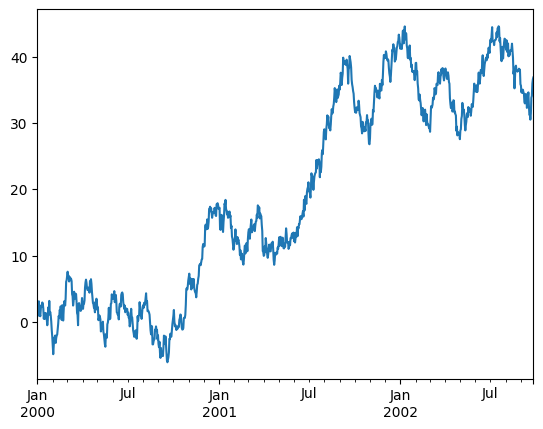

In [134]:
ts.plot()


In [135]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])


In [136]:
df = df.cumsum()


<Figure size 640x480 with 0 Axes>

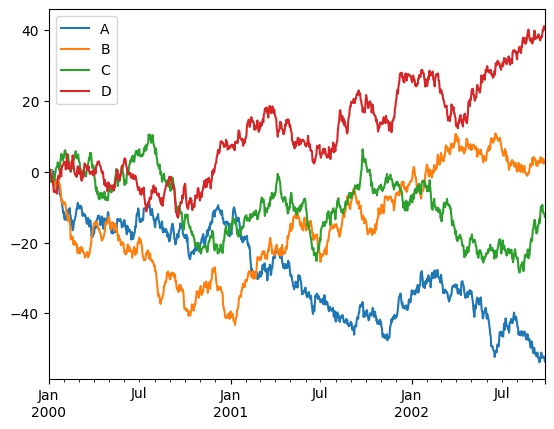

In [137]:
plt.figure()
df.plot()
plt.legend(loc='best')


## 导入导出数据

[返回目录](#目录)

In [141]:
df.to_csv('data/foo.csv')


In [147]:
pd.read_csv('data/foo.csv').head()


,Unnamed: 0,A,B,C,D
0,2000-01-01,1.226482,-0.630609,0.058740,0.970915
1,2000-01-02,0.261173,-0.522171,0.859773,0.814352
2,2000-01-03,-1.483249,-0.170467,-0.349565,-0.394823
3,2000-01-04,-1.222066,0.014115,0.156024,-0.673645
4,2000-01-05,-0.852567,0.505328,-1.866429,-0.690695


In [153]:
df.to_excel('data/foo.xlsx', sheet_name='Sheet1')


In [154]:
pd.read_excel('data/foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()


,Unnamed: 0,A,B,C,D
0,2000-01-01,1.226482,-0.630609,0.058740,0.970915
1,2000-01-02,0.261173,-0.522171,0.859773,0.814352
2,2000-01-03,-1.483249,-0.170467,-0.349565,-0.394823
3,2000-01-04,-1.222066,0.014115,0.156024,-0.673645
4,2000-01-05,-0.852567,0.505328,-1.866429,-0.690695
